# **Stock Market Prediction And Forecasting Using Stacked LSTM**

In [80]:
### Keras and Tensorflow >2.0

In [81]:
### Data Collection
import pandas_datareader as pdr

In [82]:
df = pdr.get_data_tiingo('AAPL', api_key='d2afd51fff81280f3c5400c96c62b95ac0999b33')

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [83]:
df.to_csv('/content/AAPL.csv')

In [84]:
import pandas as pd

In [85]:
df=pd.read_csv('AAPL.csv')

In [86]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-06 00:00:00+00:00,130.29,130.500,128.90,129.13,26845924,30.656220,30.705632,30.329164,30.383281,107383696,0.00,1.0
1,AAPL,2017-02-07 00:00:00+00:00,131.53,132.090,130.45,130.54,38183841,30.947983,31.079746,30.693867,30.715043,152735364,0.00,1.0
2,AAPL,2017-02-08 00:00:00+00:00,132.04,132.220,131.22,131.35,23004072,31.067982,31.110334,30.875042,30.905630,92016288,0.00,1.0
3,AAPL,2017-02-09 00:00:00+00:00,132.42,132.445,131.12,131.65,28349859,31.291509,31.297417,30.984313,31.109554,113399436,0.57,1.0
4,AAPL,2017-02-10 00:00:00+00:00,132.12,132.940,132.05,132.46,20065458,31.220618,31.414388,31.204076,31.300961,80261832,0.00,1.0


In [87]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2022-01-28 00:00:00+00:00,170.33,170.3500,162.80,165.710,179935660,170.33,170.3500,162.80,165.710,179935660,0.0,1.0
1255,AAPL,2022-01-31 00:00:00+00:00,174.78,175.0000,169.51,170.160,115541590,174.78,175.0000,169.51,170.160,115541590,0.0,1.0
1256,AAPL,2022-02-01 00:00:00+00:00,174.61,174.8400,172.31,174.010,86213911,174.61,174.8400,172.31,174.010,86213911,0.0,1.0
1257,AAPL,2022-02-02 00:00:00+00:00,175.84,175.8800,173.33,174.745,84914256,175.84,175.8800,173.33,174.745,84914256,0.0,1.0
1258,AAPL,2022-02-03 00:00:00+00:00,172.90,176.2399,172.12,174.480,89418074,172.90,176.2399,172.12,174.480,89418074,0.0,1.0


## **using only close feature**

In [88]:
df1=df.reset_index()['close']

In [89]:
df1.shape

(1259,)

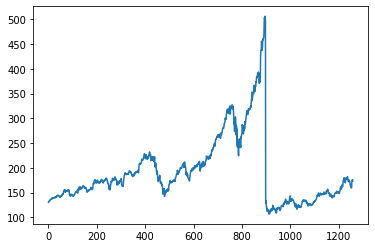

In [90]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [91]:
import numpy as np

In [92]:
df1

0       130.29
1       131.53
2       132.04
3       132.42
4       132.12
         ...  
1254    170.33
1255    174.78
1256    174.61
1257    175.84
1258    172.90
Name: close, Length: 1259, dtype: float64

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

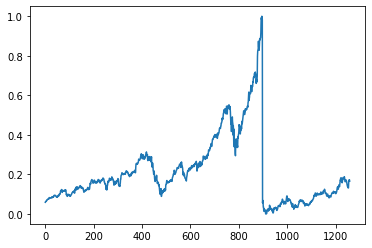

In [94]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [95]:
print(df1)

[[0.05873513]
 [0.06184095]
 [0.06311835]
 ...
 [0.16974327]
 [0.17282405]
 [0.16546024]]


### **train test split method to be followed in time series data**
### **next data is dependent on previous data, splitting should be ordered**

In [96]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [97]:
training_size,test_size

(818, 441)

In [98]:
train_data[:10]

array([[0.05873513],
       [0.06184095],
       [0.06311835],
       [0.06407013],
       [0.06331872],
       [0.06624922],
       [0.07058234],
       [0.07180964],
       [0.07139637],
       [0.07233563]])

## **Data Preprocessing**

In [99]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [100]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [101]:
print(X_train.shape)
print(y_train.shape)

(717, 100)
(717,)


In [102]:
print(X_train[:1])
print(y_train[:1])

[[0.05873513 0.06184095 0.06311835 0.06407013 0.06331872 0.06624922
  0.07058234 0.07180964 0.07139637 0.07233563 0.07479023 0.07581716
  0.07436443 0.07469004 0.07536631 0.07551659 0.08252974 0.08045085
  0.0825047  0.08140263 0.08185348 0.08055103 0.07974953 0.08090169
  0.08105197 0.08052599 0.08420789 0.08478397 0.08303068 0.08671259
  0.08265498 0.0866124  0.08536005 0.08465874 0.08525986 0.09257358
  0.09337508 0.09289919 0.09222292 0.09232311 0.09500313 0.09312461
  0.09222292 0.09142142 0.09099562 0.08713838 0.08756418 0.08568566
  0.08763932 0.08606137 0.08475892 0.08916719 0.08874139 0.09217282
  0.094402   0.09227301 0.09254853 0.09219787 0.09953663 0.101866
  0.10073889 0.0994114  0.10549781 0.11564183 0.11809643 0.116268
  0.11799624 0.12338134 0.12237946 0.12180338 0.10872887 0.11446462
  0.11576706 0.11809643 0.11762054 0.11646838 0.11779587 0.11714465
  0.11729493 0.11501565 0.11606763 0.12175329 0.11794615 0.11924859
  0.12155291 0.12060113 0.1055479  0.09663118 0.0995

In [103]:
print(X_test.shape)
print(ytest.shape)

(340, 100)
(340,)


### reshape into 3d for giving to LSTM model

In [104]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [105]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [106]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [108]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 347ms/step - loss: 0.0206 - val_loss: 0.0026
Epoch 2/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0048 - val_loss: 0.0075
Epoch 3/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0014 - val_loss: 3.5637e-04
Epoch 5/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0010 - val_loss: 3.3742e-04
Epoch 6/100
12/12 [==============================] - 3s 220ms/step - loss: 9.3260e-04 - val_loss: 2.7351e-04
Epoch 7/100
12/12 [==============================] - 3s 240ms/step - loss: 9.9399e-04 - val_loss: 2.8920e-04
Epoch 8/100
12/12 [==============================] - 4s 319ms/step - loss: 8.3355e-04 - val_loss: 3.3014e-04
Epoch 9/100
12/12 [==============================] - 3s 221ms/step - loss: 7.7921e-04 - val_loss: 2.3107e-04
Epoch 10/100
12/12 [==============================

In [109]:
import tensorflow as tf

In [110]:
tf.__version__

'2.7.0'

In [111]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [112]:
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [113]:
train_predict[:5]

array([[146.13528],
       [146.17676],
       [146.14288],
       [146.02843],
       [145.89088]], dtype=float32)

In [114]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

205.21226332614432

In [115]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

141.23791647783483

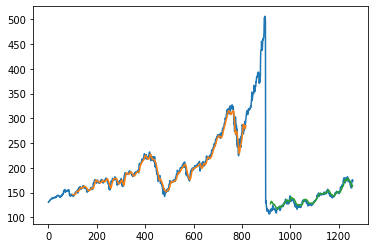

In [116]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [117]:
len(test_data)

441

In [118]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [119]:
x_input[:1]

array([[0.10339386, 0.10567314, 0.10507201, 0.09823419, 0.09041954,
        0.09164684, 0.0977082 , 0.10016281, 0.10038823, 0.09650595,
        0.0878397 , 0.09014402, 0.08681277, 0.08969317, 0.08090169,
        0.08583594, 0.08806512, 0.09129618, 0.09031935, 0.09009393,
        0.08683782, 0.085335  , 0.09247339, 0.09517846, 0.09946149,
        0.10499687, 0.10624922, 0.10680025, 0.10482154, 0.10469631,
        0.1063995 , 0.10522229, 0.11453976, 0.10760175, 0.10549781,
        0.10815279, 0.11183469, 0.1105072 , 0.1113087 , 0.10920476,
        0.1101315 , 0.10289292, 0.10276769, 0.10807765, 0.10810269,
        0.11060739, 0.11684408, 0.12781465, 0.13452724, 0.13570445,
        0.13668128, 0.13800877, 0.12515967, 0.13375078, 0.14642455,
        0.14509706, 0.14256731, 0.1377583 , 0.14647464, 0.16115216,
        0.17092048, 0.16961803, 0.181866  , 0.17257358, 0.16904195,
        0.18149029, 0.16385723, 0.16105197, 0.15757044, 0.16568566,
        0.17232311, 0.17392611, 0.18407013, 0.18

In [120]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [121]:
temp_input

[0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569,
 0.08783969943644326,
 0.09014402003757044,
 0.08681277395115838,
 0.08969317470256727,
 0.08090169067000619,
 0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885

In [122]:
temp_input[:10]

[0.10339386349405133,
 0.10567313713212267,
 0.10507201001878513,
 0.09823418910457105,
 0.0904195366311834,
 0.0916468378209142,
 0.09770820288040072,
 0.10016280525986221,
 0.10038822792736374,
 0.09650594865372569]

In [123]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15405726]
101
1 day input [0.10567314 0.10507201 0.09823419 0.09041954 0.09164684 0.0977082
 0.10016281 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277
 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935
 0.09009393 0.08683782 0.085335   0.09247339 0.09517846 0.09946149
 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995
 0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048
 0.16961803 0.181866   0.17257358 0.16904195 0.18149029 0.16385723
 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013
 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217
 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759
 0.1636819  0.16588604 0.15769568 0

In [124]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [125]:
import matplotlib.pyplot as plt

In [126]:
len(df1)

1259

## **new 30 days output**

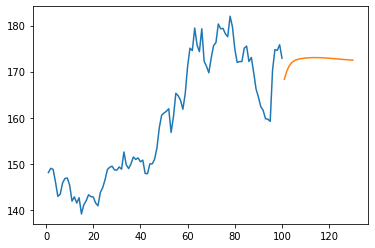

In [127]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

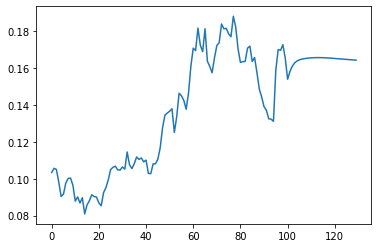

In [128]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1159:])

In [129]:
df3=scaler.inverse_transform(df3).tolist()

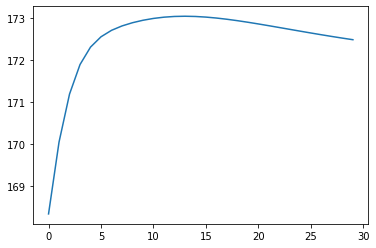

In [131]:
plt.plot(df3[1259:])

## **END**